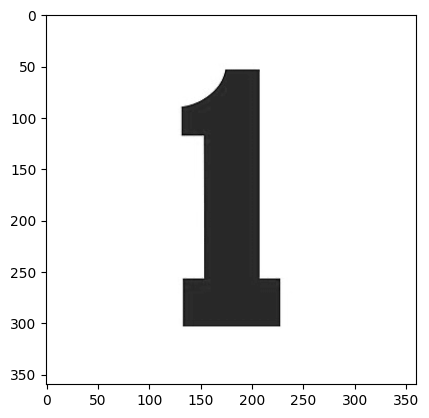

In [163]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('assets/one.png', cv2.IMREAD_GRAYSCALE)  # Grayscale image
plt.imshow(img, cmap='gray')
plt.show()

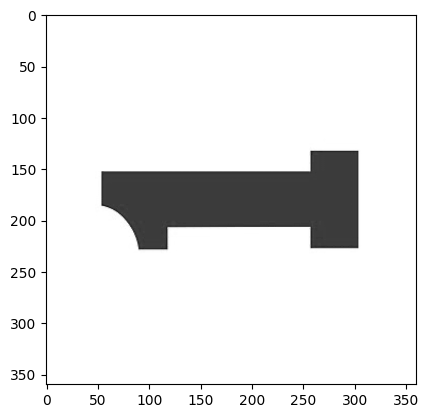

In [164]:
def rotate_image(img, angle):
    # Get image dimensions and compute rotation matrix
    h, w = img.shape
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(img, matrix, (w, h))
    return rotated

# Test rotating the image
plt.imshow(rotate_image(img, 90), cmap='gray')
plt.show()

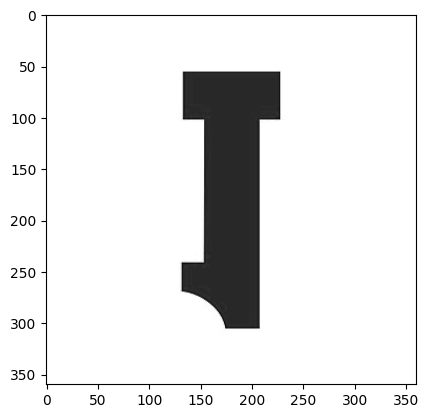

In [165]:
def reflect_image(img, axis):
    # Flip the image along the given axis
    if axis == 'horizontal':
        return cv2.flip(img, 1)  # Horizontal flip
    elif axis == 'vertical':
        return cv2.flip(img, 0)  # Vertical flip

# Test reflecting the image
plt.imshow(reflect_image(img, 'vertical'), cmap='gray')
plt.show()

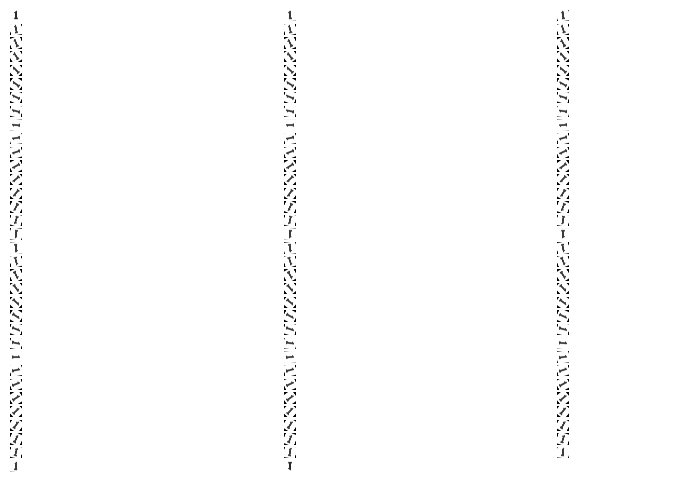

In [166]:
def apply_group_actions(img, angles):
    transformations = []
    for angle in angles:
        transformations.append(rotate_image(img, angle))
    for reflection in ['vertical']:
        transformations.append(reflect_image(img, reflection))
    return transformations

# Example usage: Specify any angles you want to explore
number_of_transformations = 100
angles = np.linspace(0, 360, num=number_of_transformations, endpoint=False)  # 8 evenly spaced angles
transformations = apply_group_actions(img, angles)

# Visualize all transformations
rows = (len(transformations) + 1) // 3  # Determine layout
fig, axes = plt.subplots(rows, 3, figsize=(10, 6))

for i, transformed_img in enumerate(transformations):
    ax = axes[i // 3, i % 3]
    ax.imshow(transformed_img, cmap='gray')
    ax.axis('off')

# Hide any empty subplots
for j in range(i + 1, rows * 3):
    axes[j // 3, j % 3].axis('off')

plt.show()

In [167]:
import numpy as np

def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

# Test MSE between original and rotated image
rotated = rotate_image(img, 180)
print(f'MSE: {mse(img, rotated)}')

MSE: 3.105162037037037


In [168]:
# Test MSE between original and reflected image
reflected = reflect_image(img, 'vertical')
print(f'MSE: {mse(img, reflected)}')

MSE: 2.875354938271605


Angle: 0.00, MSE: 0.00
Angle: 0.04, MSE: 0.49
Angle: 0.07, MSE: 0.73
Angle: 0.11, MSE: 0.86
Angle: 0.14, MSE: 1.02
Angle: 0.18, MSE: 1.17
Angle: 0.22, MSE: 1.31
Angle: 0.25, MSE: 1.51
Angle: 0.29, MSE: 1.56
Angle: 0.32, MSE: 1.62
Angle: 0.36, MSE: 1.66
Angle: 0.40, MSE: 1.67
Angle: 0.43, MSE: 1.66
Angle: 0.47, MSE: 1.70
Angle: 0.50, MSE: 1.79
Angle: 0.54, MSE: 1.89
Angle: 0.58, MSE: 1.99
Angle: 0.61, MSE: 2.03
Angle: 0.65, MSE: 2.03
Angle: 0.68, MSE: 2.00
Angle: 0.72, MSE: 2.02
Angle: 0.76, MSE: 1.99
Angle: 0.79, MSE: 2.00
Angle: 0.83, MSE: 2.02
Angle: 0.86, MSE: 2.09
Angle: 0.90, MSE: 2.14
Angle: 0.94, MSE: 2.19
Angle: 0.97, MSE: 2.21
Angle: 1.01, MSE: 2.22
Angle: 1.04, MSE: 2.28
Angle: 1.08, MSE: 2.35
Angle: 1.12, MSE: 2.36
Angle: 1.15, MSE: 2.42
Angle: 1.19, MSE: 2.43
Angle: 1.22, MSE: 2.48
Angle: 1.26, MSE: 2.52
Angle: 1.30, MSE: 2.55
Angle: 1.33, MSE: 2.50
Angle: 1.37, MSE: 2.55
Angle: 1.40, MSE: 2.58
Angle: 1.44, MSE: 2.58
Angle: 1.48, MSE: 2.62
Angle: 1.51, MSE: 2.60
Angle: 1.55

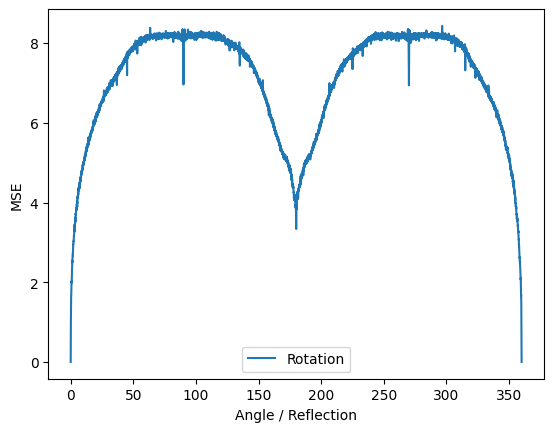

In [169]:
# Test MSE for different angles
number_of_transformations = 10000
angles = np.linspace(0, 360, num=number_of_transformations, endpoint=True)
transformations = apply_group_actions(img, angles)
mse_values = []
for i, transformed_img in enumerate(transformations):
    mse_val = mse(img, transformed_img)
    if i < number_of_transformations:
        print(f'Angle: {angles[i]:.2f}, MSE: {mse_val:.2f}')
    elif i >= number_of_transformations:
        print(f'Reflection: {i - number_of_transformations}, MSE: {mse_val:.2f}')
    mse_values.append(mse_val)
    
print(mse_values)

# Plot the MSE values by angle
plt.plot(angles, mse_values[:-1], label='Rotation')
plt.xlabel('Angle / Reflection')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [170]:
new_img = cv2.imread('two.png', cv2.IMREAD_GRAYSCALE)


[ WARN:0@223931.019] global loadsave.cpp:248 findDecoder imread_('two.png'): can't open/read file: check file path/integrity


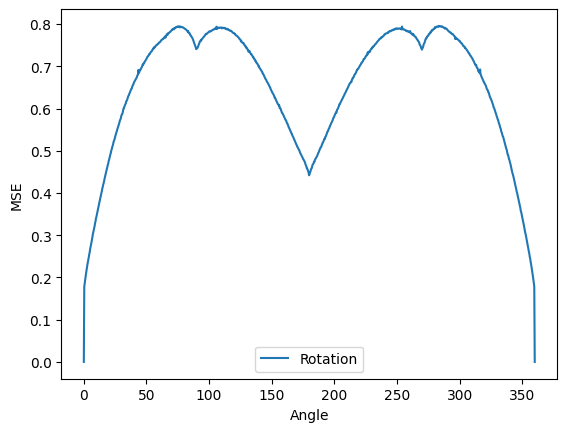

In [171]:
def plot_mse_by_angle(img, number_of_transformations):
    angles = np.linspace(0, 360, num=number_of_transformations, endpoint=True)
    transformations = apply_group_actions(img, angles)
    mse_values = []
    for i, transformed_img in enumerate(transformations):
        mse_val = mse(img, transformed_img)
        mse_values.append(mse_val)
    plt.plot(angles, mse_values[:-1], label='Rotation')
    plt.xlabel('Angle')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
# Example usage
new_img = cv2.imread('assets/two.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(new_img, 1000)


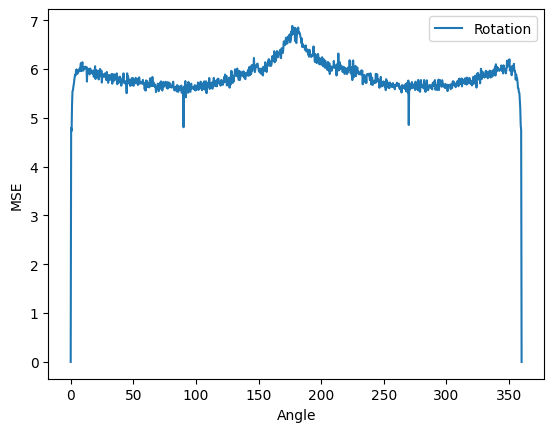

In [172]:
three_img = cv2.imread('assets/three.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(three_img, 1000)

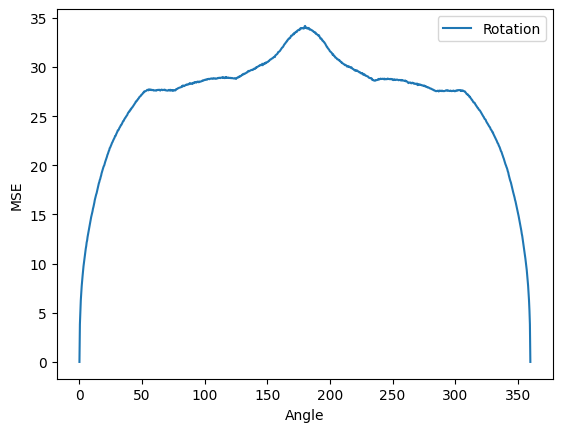

In [173]:
four_img = cv2.imread('assets/four.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(four_img, 1000)

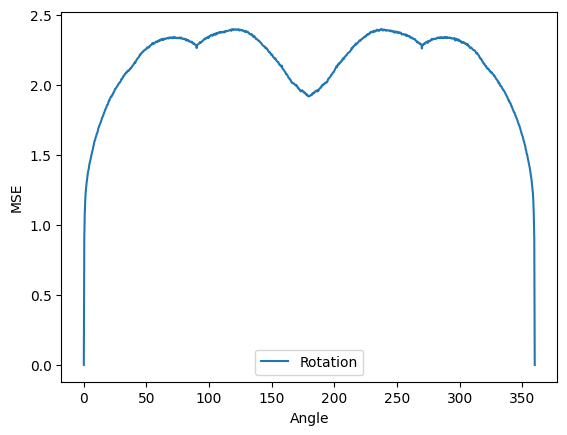

In [174]:
five_img = cv2.imread('assets/five.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(five_img, 1000)

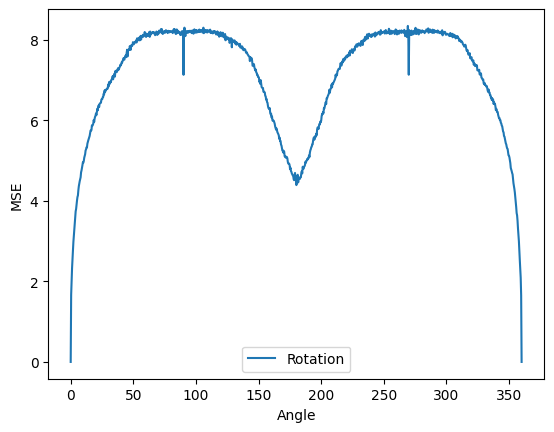

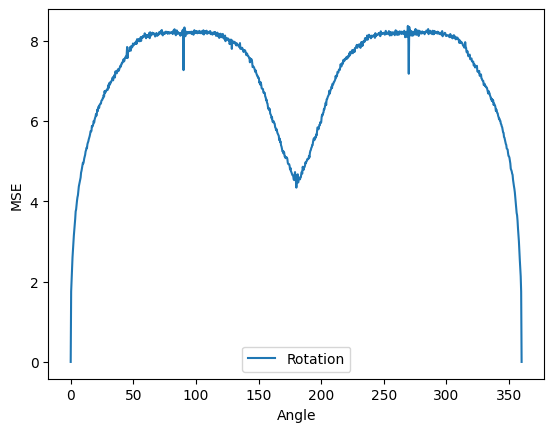

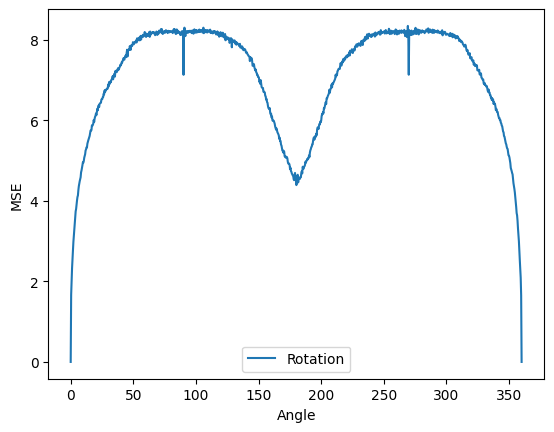

In [175]:
rotated_one_img = cv2.imread('assets/rotatedone.png', cv2.IMREAD_GRAYSCALE)
# rotate the image 270 degrees and then plot the MSE by angle
new_rotated_one_img = rotate_image(rotated_one_img, 270)
plot_mse_by_angle(rotated_one_img, 1000)
plot_mse_by_angle(new_rotated_one_img, 1000)

# compare the plots with each other
plot_mse_by_angle(rotated_one_img, 1000)

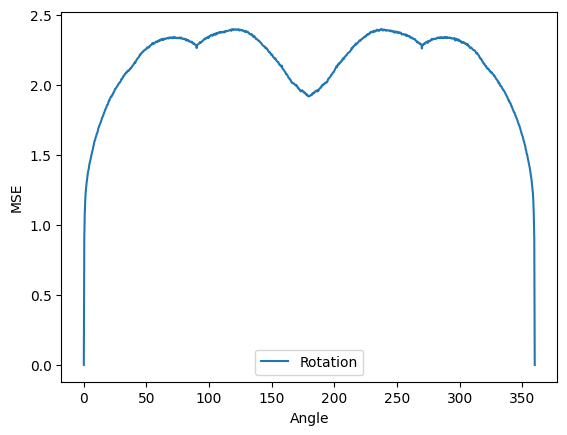

In [176]:
six_img = cv2.imread('assets/six.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(five_img, 1000)

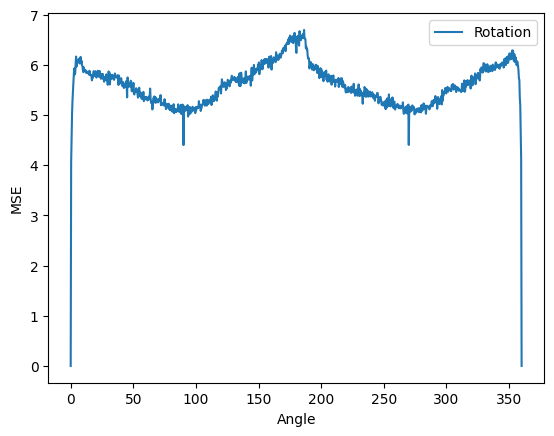

In [181]:
seven_img = cv2.imread('assets/seven.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(seven_img, 1000)

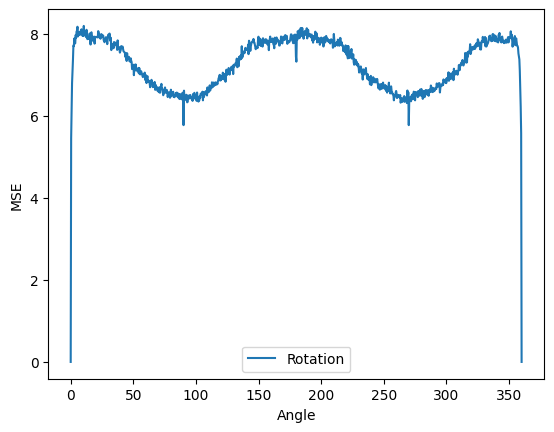

In [182]:
eight_img = cv2.imread('assets/eight.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(eight_img, 1000)

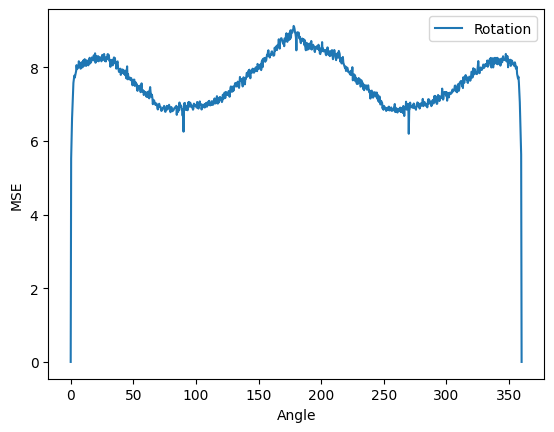

In [179]:
nine_img = cv2.imread('assets/nine.png', cv2.IMREAD_GRAYSCALE)
plot_mse_by_angle(nine_img, 1000)